In [1]:
import tensorflow as tf

In [2]:
for gpu in tf.config.experimental.list_physical_devices("GPU"):
    tf.compat.v2.config.experimental.set_memory_growth(gpu, True)

In [7]:
import logging
logging.getLogger("tensorflow").disabled = True

In [28]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

In [9]:
model = load_model("cats_and_dogs_2.h5")

In [10]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 15, 15, 128)      

In [11]:
img_path = "/home/rtx/jobin/chollet_keras/data/kaggle_pets/test/cats/cat.10002.jpg"

In [24]:
img = image.load_img(img_path,target_size=(150,150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor,axis=0)
img_tensor = img_tensor/255.

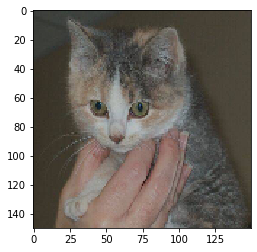

In [27]:
plt.imshow(img_tensor[0])

In [31]:
layer_outputs = [layer.output for layer in model.layers[:8]]

In [33]:
activation_model = Model(model.input,layer_outputs)

In [35]:
activations = activation_model.predict(img_tensor)

In [52]:
len(activations)

8

In [37]:
first_layer_activation = activations[0]
first_layer_activation.shape

(1, 148, 148, 32)

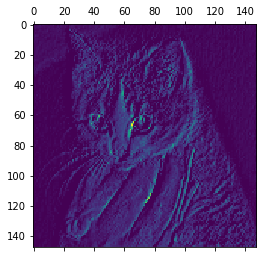

In [48]:
plt.matshow(first_layer_activation[0,:,:,7],cmap="viridis")

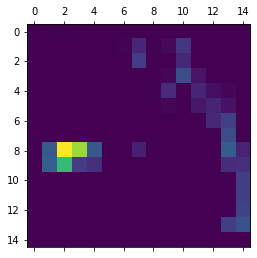

In [74]:
plt.matshow(activations[6][0,:,:,7])

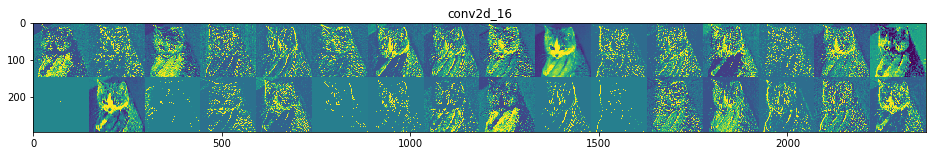

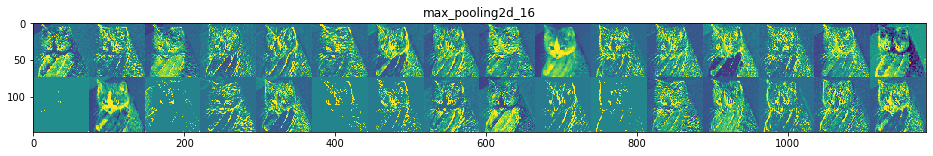

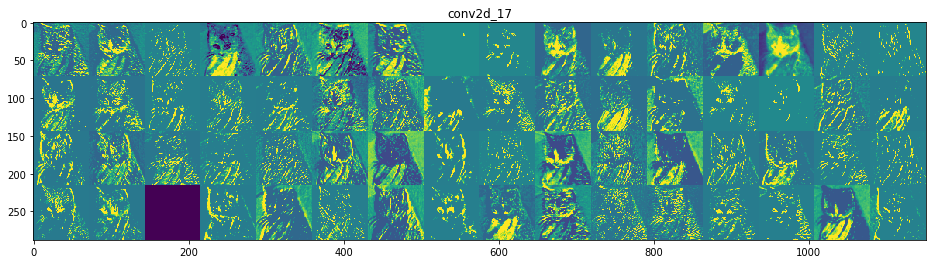

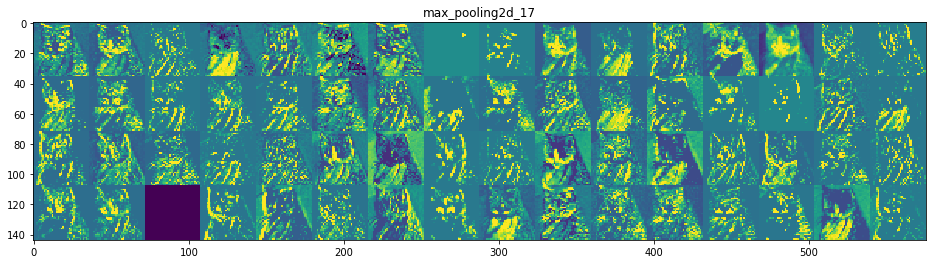

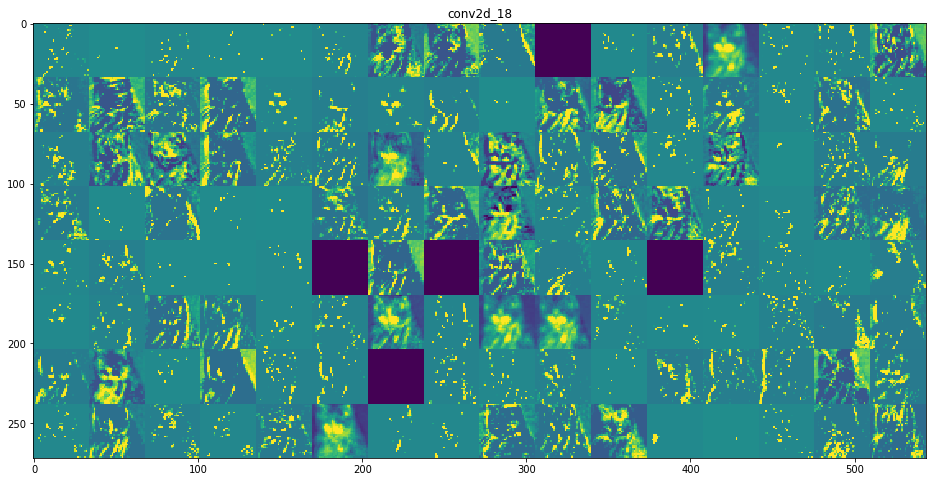

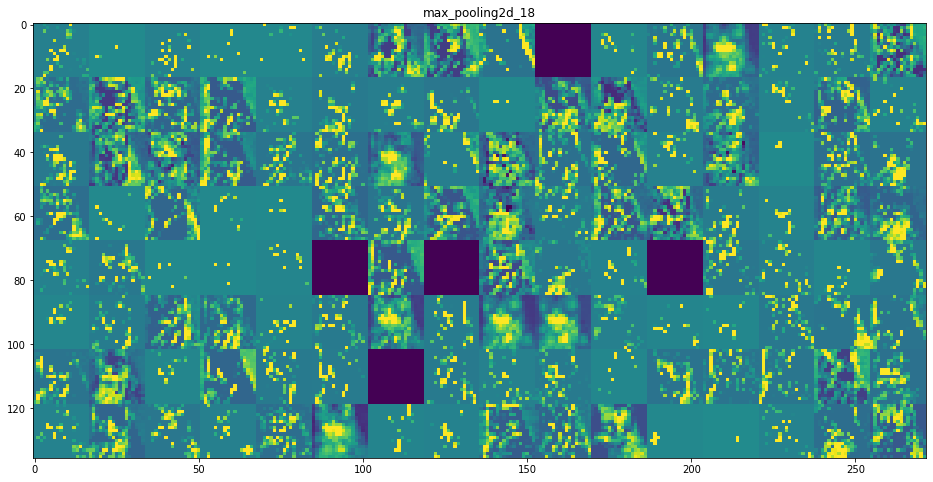

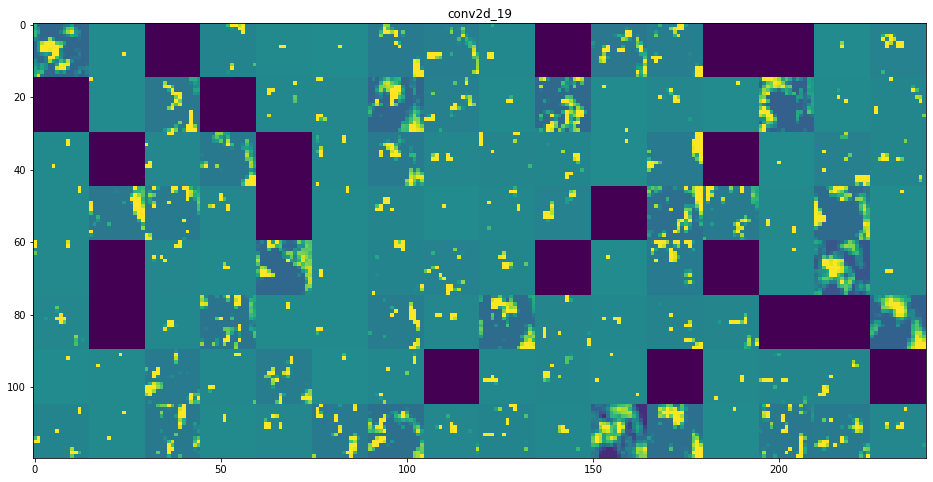

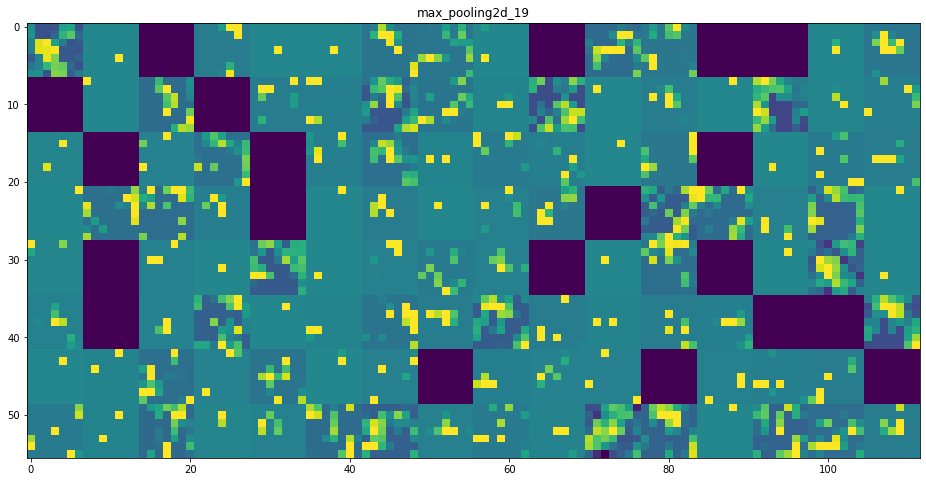

In [78]:
layer_names = [layer.name for layer in model.layers[:8]]
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size*n_cols,size*images_per_row))
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:,:,col*images_per_row+row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image,0,255).astype(np.uint8)
            display_grid[col*size:(col+1)*size,
                         row*size:(row+1)*size] = channel_image
    
    scale = 1./size
    plt.figure(figsize=(scale*display_grid.shape[1],scale*display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid,aspect="auto",cmap="viridis")    